In [4]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
# import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

SyntaxError: invalid syntax (<ipython-input-148-d728e465cd35>, line 1)

In [5]:
import pickle
with open('players.pkl', 'rb') as f:
    new = pickle.load(f)
   

In [6]:
all_games= pd.read_pickle('all_games.pkl')
all_games


,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0
4,2020/2021,2021-02-08 20:00:00,Premier League,Leeds United,Crystal Palace,2,0,1.80,3.8,4.20,3
5,2020/2021,2021-02-08 20:00:00,La Liga Primera Division,Atlético Madrid,RC Celta,2,2,1.60,3.6,6.50,1
19,2020/2021,2021-02-07 20:00:00,Le Championnat,Olympique de Marseille,Paris Saint-Germain,0,2,7.50,5.0,1.40,0
20,2020/2021,2021-02-07 20:00:00,La Liga Primera Division,Real Betis,FC Barcelona,2,3,5.75,4.6,1.50,0
23,2020/2021,2021-02-07 19:45:00,Serie A,Lazio,Cagliari,1,0,1.36,5.0,8.00,3
...,...,...,...,...,...,...,...,...,...,...,...
77246,2014/2015,2014-08-09 00:00:00,Le Championnat,OGC Nice,Toulouse Football Club,3,2,2.63,3.1,2.75,3
77256,2014/2015,2014-08-09 00:00:00,Premier League,Dundee,Kilmarnock,1,1,2.38,3.2,3.00,1
77258,2014/2015,2014-08-09 00:00:00,Le Championnat,Sporting Club de Bastia,Olympique de Marseille,3,3,3.90,3.1,2.05,1
77259,2014/2015,2014-08-09 00:00:00,Le Championnat,Évian Thonon Gaillard FC,Stade Malherbe Caen,0,3,2.38,3.2,3.00,0


In [7]:
new[0].head(60)


,short_name,long_name,nationality,club_name,league_name,overall,team_position,pace,shooting,passing,...,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Season
0,L. Messi,Lionel Andrés Messi Cuccittini,Argentina,FC Barcelona,Spain Primera Division,93,CF,93.0,89.0,86.0,...,76,25,21,20,6,11,15,14,8,2014/2015
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Portugal,Real Madrid,Spain Primera Division,92,LW,93.0,93.0,81.0,...,85,22,31,23,7,11,15,14,11,2014/2015
3,Z. Ibrahimović,Zlatan Ibrahimović,Sweden,Paris Saint-Germain,French Ligue 1,90,ST,76.0,91.0,81.0,...,91,25,41,27,13,15,10,9,12,2014/2015
4,M. Neuer,Manuel Neuer,Germany,FC Bayern München,German 1. Bundesliga,90,GK,NaN,NaN,NaN,...,37,25,25,25,87,85,92,90,86,2014/2015
5,L. Suárez,Luis Alberto Suárez Díaz,Uruguay,FC Barcelona,Spain Primera Division,89,RES,83.0,87.0,79.0,...,85,30,45,38,27,25,31,33,37,2014/2015
6,Iniesta,Andrés Iniesta Luján,Spain,FC Barcelona,Spain Primera Division,89,LCM,75.0,72.0,89.0,...,71,57,57,56,6,13,6,13,7,2014/2015
7,E. Hazard,Eden Hazard,Belgium,Chelsea,English Premier League,88,LM,90.0,82.0,84.0,...,86,25,27,22,11,12,6,8,8,2014/2015
8,R. van Persie,Robin van Persie,Netherlands,Manchester United,English Premier League,88,RS,74.0,90.0,82.0,...,86,23,32,21,9,10,5,7,8,2014/2015
12,G. Bale,Gareth Frank Bale,Wales,Real Madrid,Spain Primera Division,87,RW,94.0,83.0,83.0,...,76,60,65,62,15,15,11,5,6,2014/2015
13,R. Lewandowski,Robert Lewandowski,Poland,FC Bayern München,German 1. Bundesliga,87,LS,80.0,84.0,74.0,...,77,25,42,25,15,6,12,8,10,2014/2015


In [79]:
hplayers = ['L. Messi', 'Cristiano Ronaldo', 'Z. Ibrahimović']
aplayers = ['L. Messi', 'Cristiano Ronaldo', 'Z. Ibrahimović']
dream_team1 = pd.DataFrame(new[0].loc[new[0].short_name.apply(lambda x: x in hplayers)])
dream_team1['club_name'] = 'HomeTeam'

new1 = new.copy()
pd.concat([new1[0], dream_team1], axis=0)
# new1[0].tail()


,short_name,long_name,nationality,club_name,league_name,overall,team_position,pace,shooting,passing,...,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Season
0,L. Messi,Lionel Andrés Messi Cuccittini,Argentina,FC Barcelona,Spain Primera Division,93,CF,93.0,89.0,86.0,...,76,25,21,20,6,11,15,14,8,2014/2015
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Portugal,Real Madrid,Spain Primera Division,92,LW,93.0,93.0,81.0,...,85,22,31,23,7,11,15,14,11,2014/2015
3,Z. Ibrahimović,Zlatan Ibrahimović,Sweden,Paris Saint-Germain,French Ligue 1,90,ST,76.0,91.0,81.0,...,91,25,41,27,13,15,10,9,12,2014/2015
4,M. Neuer,Manuel Neuer,Germany,FC Bayern München,German 1. Bundesliga,90,GK,NaN,NaN,NaN,...,37,25,25,25,87,85,92,90,86,2014/2015
5,L. Suárez,Luis Alberto Suárez Díaz,Uruguay,FC Barcelona,Spain Primera Division,89,RES,83.0,87.0,79.0,...,85,30,45,38,27,25,31,33,37,2014/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16114,A. Iglio,Alberto Iglio,Italy,Cesena,Italian Serie A,46,RES,NaN,NaN,NaN,...,29,25,25,25,53,41,44,41,49,2014/2015
16139,M. Fissore,Matteo Fissore,Italy,Genoa,Italian Serie A,44,RES,58.0,26.0,28.0,...,37,39,44,43,8,14,10,12,5,2014/2015
0,L. Messi,Lionel Andrés Messi Cuccittini,Argentina,HomeTeam,Spain Primera Division,93,CF,93.0,89.0,86.0,...,76,25,21,20,6,11,15,14,8,2014/2015
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Portugal,HomeTeam,Spain Primera Division,92,LW,93.0,93.0,81.0,...,85,22,31,23,7,11,15,14,11,2014/2015


In [95]:
Season = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]
hplayers = ['L. Messi', 'Cristiano Ronaldo', 'Z. Ibrahimović']
aplayers = ['L. Messi', 'Cristiano Ronaldo', 'Z. Ibrahimović']
def create_players(data, hplayers, aplayers):
    result_list =[]
    for season in data:
        
        dream_team1 = pd.DataFrame(season.loc[season.short_name.apply(lambda x: x in hplayers)])
        dream_team1['club_name'] = 'HomeTeam'
        
        dream_team2 = pd.DataFrame(season.loc[season.short_name.apply(lambda x: x in aplayers)])
        dream_team2['club_name'] = 'AwayTeam'
        season = pd.concat([season, dream_team1, dream_team2], axis=0)
        result_list.append(season)
    return (result_list)
#find player name and year
# do it for both teams
# find row copy it and change team name, append row to dataframe



In [97]:
#append at end ofdataframes
example = create_players(new, hplayers, aplayers)
example[1]


,short_name,long_name,nationality,club_name,league_name,overall,team_position,pace,shooting,passing,...,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Season
0,L. Messi,Lionel Andrés Messi Cuccittini,Argentina,FC Barcelona,Spain Primera Division,94,RW,92.0,88.0,86.0,...,74,13,23,21,6,11,15,14,8,2015/2016
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Portugal,Real Madrid,Spain Primera Division,93,LM,92.0,93.0,80.0,...,85,22,31,23,7,11,15,14,11,2015/2016
3,M. Neuer,Manuel Neuer,Germany,FC Bayern München,German 1. Bundesliga,90,GK,NaN,NaN,NaN,...,37,10,10,11,85,87,91,90,86,2015/2016
4,L. Suárez,Luis Alberto Suárez Díaz,Uruguay,FC Barcelona,Spain Primera Division,90,ST,83.0,88.0,79.0,...,85,30,45,38,27,25,31,33,37,2015/2016
5,E. Hazard,Eden Hazard,Belgium,Chelsea,English Premier League,89,LM,90.0,82.0,84.0,...,86,25,27,22,11,12,6,8,8,2015/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Portugal,HomeTeam,Spain Primera Division,93,LM,92.0,93.0,80.0,...,85,22,31,23,7,11,15,14,11,2015/2016
6,Z. Ibrahimović,Zlatan Ibrahimović,Sweden,HomeTeam,French Ligue 1,89,ST,73.0,90.0,81.0,...,91,15,41,27,13,15,10,9,12,2015/2016
0,L. Messi,Lionel Andrés Messi Cuccittini,Argentina,AwayTeam,Spain Primera Division,94,RW,92.0,88.0,86.0,...,74,13,23,21,6,11,15,14,8,2015/2016
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Portugal,AwayTeam,Spain Primera Division,93,LM,92.0,93.0,80.0,...,85,22,31,23,7,11,15,14,11,2015/2016


In [45]:
def defense_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]
    updated_fifas = []
    for i, season in enumerate(fifas):
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        defending = season.groupby('club_name').agg({'defending': ['mean']})
        defending['overall'] = season.groupby('club_name').agg({'overall': ['mean']})
        
        defending['Season'] = years[i]
        updated_fifas.append(defending)
    return updated_fifas

In [46]:
fifa_ags = defense_column(new)

fifa_ags_def = fifa_ags[0].append(fifa_ags[1])
fifa_ags_def = fifa_ags_def.append(fifa_ags[2])
fifa_ags_def = fifa_ags_def.append(fifa_ags[3])
fifa_ags_def = fifa_ags_def.append(fifa_ags[4])
fifa_ags_def = fifa_ags_def.append(fifa_ags[5])
fifa_ags_def = fifa_ags_def.append(fifa_ags[6])
fifa_ags_def.columns = ['defending_mean', 'overall', 'Season']
fifa_ags_def.index.name = 'club_name'
fifa_ags_def.reset_index(inplace=True)
fifa_ags_def


,club_name,defending_mean,overall,Season
0,1. FC Köln,52.214286,68.812500,2014/2015
1,1. FSV Mainz 05,52.277778,68.000000,2014/2015
2,AS Monaco,57.384615,72.562500,2014/2015
3,AS Saint-Étienne,57.400000,69.941176,2014/2015
4,Arsenal,56.058824,71.571429,2014/2015
...,...,...,...,...
681,VfL Wolfsburg,53.600000,71.000000,2020/2021
682,Villarreal CF,59.555556,73.000000,2020/2021
683,West Bromwich Albion,52.277778,67.650000,2020/2021
684,West Ham United,55.944444,69.380952,2020/2021


In [47]:
fifa_ags_def['defense_mean'] = fifa_ags_def.mean(axis=1)
fifa_ags_def


,club_name,defending_mean,overall,Season,defense_mean
0,1. FC Köln,52.214286,68.812500,2014/2015,60.513393
1,1. FSV Mainz 05,52.277778,68.000000,2014/2015,60.138889
2,AS Monaco,57.384615,72.562500,2014/2015,64.973558
3,AS Saint-Étienne,57.400000,69.941176,2014/2015,63.670588
4,Arsenal,56.058824,71.571429,2014/2015,63.815126
...,...,...,...,...,...
681,VfL Wolfsburg,53.600000,71.000000,2020/2021,62.300000
682,Villarreal CF,59.555556,73.000000,2020/2021,66.277778
683,West Bromwich Albion,52.277778,67.650000,2020/2021,59.963889
684,West Ham United,55.944444,69.380952,2020/2021,62.662698


In [48]:
def offense_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]
    offense_columns = ['passing', 'dribbling', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                       'skill_long_passing', 'skill_ball_control']
    updated_fifas = []
    for i, season in enumerate(fifas):
        
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        offense = season.groupby('club_name').agg({'passing': ['mean']})
#         offense.iloc[:,1] = ['passing mean']
        offense['dribbling mean'] = season.groupby('club_name').agg({'dribbling': ['mean']})
        offense['attacking_crossing mean'] = season.groupby('club_name').agg({'attacking_crossing': ['mean']})
        offense['attacking_finishing mean'] = season.groupby('club_name').agg({'attacking_finishing': ['mean']})
        offense['attacking_heading_accuracy mean'] = season.groupby('club_name').agg({'attacking_heading_accuracy': ['mean']})
        offense['skill_long_passing'] = season.groupby('club_name').agg({'skill_long_passing': ['mean']})
        offense['skill_ball_control'] = season.groupby('club_name').agg({'skill_ball_control': ['mean']})
      

        offense['Season'] = years[i]

            
        
        updated_fifas.append(offense)
    return updated_fifas


In [49]:
fifa_ags = offense_column(new)
fifa_ags[0]
fifa_ags_off = fifa_ags[0].append(fifa_ags[1])
fifa_ags_off = fifa_ags_off.append(fifa_ags[2])
fifa_ags_off = fifa_ags_off.append(fifa_ags[3])
fifa_ags_off = fifa_ags_off.append(fifa_ags[4])
fifa_ags_off = fifa_ags_off.append(fifa_ags[5])
fifa_ags_off = fifa_ags_off.append(fifa_ags[6])
# fifa_ags_off.columns = ['defending_mean', 'season']
fifa_ags_off.index.name = 'club_name'
fifa_ags_off.reset_index(inplace=True)
fifa_ags_off


,club_name,passing,dribbling mean,attacking_crossing mean,attacking_finishing mean,attacking_heading_accuracy mean,skill_long_passing,skill_ball_control,Season
,,mean,,,,,,,
0,1. FC Köln,56.928571,64.285714,50.750000,48.875000,58.562500,50.625000,60.437500,2014/2015
1,1. FSV Mainz 05,62.333333,67.833333,57.950000,50.250000,57.300000,57.500000,63.550000,2014/2015
2,AS Monaco,67.769231,69.538462,57.437500,50.812500,60.000000,58.562500,64.250000,2014/2015
3,AS Saint-Étienne,61.600000,65.000000,56.352941,49.705882,60.588235,55.882353,60.941176,2014/2015
4,Arsenal,65.647059,71.235294,54.952381,49.047619,55.095238,56.857143,62.952381,2014/2015
...,...,...,...,...,...,...,...,...,...
681,VfL Wolfsburg,61.266667,68.466667,49.722222,50.333333,52.722222,51.777778,61.833333,2020/2021
682,Villarreal CF,63.444444,68.166667,53.550000,51.650000,58.550000,59.000000,65.750000,2020/2021
683,West Bromwich Albion,57.222222,62.888889,49.400000,44.250000,53.500000,54.700000,59.000000,2020/2021


In [50]:
fifa_ags_off['offense_mean'] = fifa_ags_off.mean(axis=1)
fifa_ags_off


,club_name,passing,dribbling mean,attacking_crossing mean,attacking_finishing mean,attacking_heading_accuracy mean,skill_long_passing,skill_ball_control,Season,offense_mean
,,mean,,,,,,,,
0,1. FC Köln,56.928571,64.285714,50.750000,48.875000,58.562500,50.625000,60.437500,2014/2015,55.780612
1,1. FSV Mainz 05,62.333333,67.833333,57.950000,50.250000,57.300000,57.500000,63.550000,2014/2015,59.530952
2,AS Monaco,67.769231,69.538462,57.437500,50.812500,60.000000,58.562500,64.250000,2014/2015,61.195742
3,AS Saint-Étienne,61.600000,65.000000,56.352941,49.705882,60.588235,55.882353,60.941176,2014/2015,58.581513
4,Arsenal,65.647059,71.235294,54.952381,49.047619,55.095238,56.857143,62.952381,2014/2015,59.398159
...,...,...,...,...,...,...,...,...,...,...
681,VfL Wolfsburg,61.266667,68.466667,49.722222,50.333333,52.722222,51.777778,61.833333,2020/2021,56.588889
682,Villarreal CF,63.444444,68.166667,53.550000,51.650000,58.550000,59.000000,65.750000,2020/2021,60.015873
683,West Bromwich Albion,57.222222,62.888889,49.400000,44.250000,53.500000,54.700000,59.000000,2020/2021,54.423016


In [51]:
def agility_fitness_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]
    
    updated_fifas = []
    for i, season in enumerate(fifas):
        
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        ag_fit = season.groupby('club_name').agg({'pace': ['mean']})

        ag_fit['movement_acceleration mean'] = season.groupby('club_name').agg({'movement_acceleration': ['mean']})
        ag_fit['movement_sprint_speed mean'] = season.groupby('club_name').agg({'movement_sprint_speed': ['mean']})
        ag_fit['movement_agility mean'] = season.groupby('club_name').agg({'movement_agility': ['mean']})
        ag_fit['movement_reactions mean'] = season.groupby('club_name').agg({'movement_reactions': ['mean']})
        ag_fit['movement_balance mean'] = season.groupby('club_name').agg({'movement_balance': ['mean']})
        ag_fit['power_jumping mean'] = season.groupby('club_name').agg({'power_jumping': ['mean']})
        ag_fit['power_stamina mean'] = season.groupby('club_name').agg({'power_stamina': ['mean']})
        ag_fit['power_strength mean'] = season.groupby('club_name').agg({'power_strength': ['mean']})

        ag_fit['Season'] = years[i]

            
        
        updated_fifas.append(ag_fit)
    return updated_fifas


In [52]:
fifa_ags = agility_fitness_column(new)

fifa_ags_ag_fit = fifa_ags[0].append(fifa_ags[1])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[2])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[3])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[4])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[5])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[6])
# fifa_ags_off.columns = ['defending_mean', 'season']
fifa_ags_ag_fit.index.name = 'club_name'
fifa_ags_ag_fit.reset_index(inplace=True)
fifa_ags_ag_fit


,club_name,pace,movement_acceleration mean,movement_sprint_speed mean,movement_agility mean,movement_reactions mean,movement_balance mean,power_jumping mean,power_stamina mean,power_strength mean,Season
,,mean,,,,,,,,,
0,1. FC Köln,71.000000,68.125000,68.562500,66.312500,66.812500,63.062500,69.250000,64.875000,69.250000,2014/2015
1,1. FSV Mainz 05,74.333333,71.850000,73.000000,68.650000,67.250000,66.700000,67.850000,64.850000,65.850000,2014/2015
2,AS Monaco,69.000000,65.562500,65.500000,63.937500,69.625000,62.625000,68.187500,63.625000,71.500000,2014/2015
3,AS Saint-Étienne,70.400000,67.235294,67.705882,62.647059,66.764706,62.705882,67.352941,68.588235,70.470588,2014/2015
4,Arsenal,74.294118,69.428571,68.428571,67.142857,68.809524,66.190476,61.476190,64.571429,64.380952,2014/2015
...,...,...,...,...,...,...,...,...,...,...,...
681,VfL Wolfsburg,70.866667,66.000000,65.277778,63.111111,69.888889,62.444444,67.388889,64.055556,66.166667,2020/2021
682,Villarreal CF,65.055556,63.750000,62.600000,65.100000,68.950000,63.950000,66.600000,63.250000,66.450000,2020/2021
683,West Bromwich Albion,68.666667,67.000000,65.400000,62.700000,64.100000,64.000000,63.050000,64.000000,64.650000,2020/2021


In [53]:
fifa_ags_ag_fit['agility_fitness_mean'] = fifa_ags_ag_fit.mean(axis=1)
fifa_ags_ag_fit

,club_name,pace,movement_acceleration mean,movement_sprint_speed mean,movement_agility mean,movement_reactions mean,movement_balance mean,power_jumping mean,power_stamina mean,power_strength mean,Season,agility_fitness_mean
,,mean,,,,,,,,,,
0,1. FC Köln,71.000000,68.125000,68.562500,66.312500,66.812500,63.062500,69.250000,64.875000,69.250000,2014/2015,67.472222
1,1. FSV Mainz 05,74.333333,71.850000,73.000000,68.650000,67.250000,66.700000,67.850000,64.850000,65.850000,2014/2015,68.925926
2,AS Monaco,69.000000,65.562500,65.500000,63.937500,69.625000,62.625000,68.187500,63.625000,71.500000,2014/2015,66.618056
3,AS Saint-Étienne,70.400000,67.235294,67.705882,62.647059,66.764706,62.705882,67.352941,68.588235,70.470588,2014/2015,67.096732
4,Arsenal,74.294118,69.428571,68.428571,67.142857,68.809524,66.190476,61.476190,64.571429,64.380952,2014/2015,67.191410
...,...,...,...,...,...,...,...,...,...,...,...,...
681,VfL Wolfsburg,70.866667,66.000000,65.277778,63.111111,69.888889,62.444444,67.388889,64.055556,66.166667,2020/2021,66.133333
682,Villarreal CF,65.055556,63.750000,62.600000,65.100000,68.950000,63.950000,66.600000,63.250000,66.450000,2020/2021,65.078395
683,West Bromwich Albion,68.666667,67.000000,65.400000,62.700000,64.100000,64.000000,63.050000,64.000000,64.650000,2020/2021,64.840741


In [54]:
# Scoring (shooting,attacking_crossing, attacking_finishing, attacking_heading_accuracy, skill_fk_accuracy, 
#          power_shot_power, power_long_shots)

def scoring_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]
    
    updated_fifas = []
    for i, season in enumerate(fifas):
        
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        scoring = season.groupby('club_name').agg({'shooting': ['mean']})

        scoring['attacking_crossing mean'] = season.groupby('club_name').agg({'attacking_crossing': ['mean']})
        scoring['attacking_finishing mean'] = season.groupby('club_name').agg({'attacking_finishing': ['mean']})
        scoring['attacking_heading_accuracy mean'] = season.groupby('club_name').agg({'attacking_heading_accuracy': ['mean']})
        scoring['skill_fk_accuracy mean'] = season.groupby('club_name').agg({'skill_fk_accuracy': ['mean']})
        scoring['power_shot_power mean'] = season.groupby('club_name').agg({'power_shot_power': ['mean']})
        scoring['power_long_shots mean'] = season.groupby('club_name').agg({'power_long_shots': ['mean']})
      

        scoring['Season'] = years[i]

            
        
        updated_fifas.append(scoring)
    return updated_fifas

In [55]:
fifa_ags = scoring_column(new)

fifa_ags_scoring = fifa_ags[0].append(fifa_ags[1])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[2])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[3])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[4])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[5])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[6])
# fifa_ags_off.columns = ['defending_mean', 'season']
fifa_ags_scoring.index.name = 'club_name'
fifa_ags_scoring.reset_index(inplace=True)
fifa_ags_scoring


,club_name,shooting,attacking_crossing mean,attacking_finishing mean,attacking_heading_accuracy mean,skill_fk_accuracy mean,power_shot_power mean,power_long_shots mean,Season
,,mean,,,,,,,
0,1. FC Köln,55.285714,50.750000,48.875000,58.562500,43.625000,62.062500,49.437500,2014/2015
1,1. FSV Mainz 05,57.166667,57.950000,50.250000,57.300000,49.400000,62.500000,54.500000,2014/2015
2,AS Monaco,60.076923,57.437500,50.812500,60.000000,50.875000,63.312500,52.687500,2014/2015
3,AS Saint-Étienne,55.400000,56.352941,49.705882,60.588235,45.294118,57.529412,52.411765,2014/2015
4,Arsenal,58.000000,54.952381,49.047619,55.095238,47.571429,57.428571,50.904762,2014/2015
...,...,...,...,...,...,...,...,...,...
681,VfL Wolfsburg,61.466667,49.722222,50.333333,52.722222,44.388889,66.277778,53.555556,2020/2021
682,Villarreal CF,58.055556,53.550000,51.650000,58.550000,45.300000,63.450000,53.900000,2020/2021
683,West Bromwich Albion,49.500000,49.400000,44.250000,53.500000,39.150000,53.250000,45.800000,2020/2021


In [56]:
fifa_ags_scoring['scoring_mean'] = fifa_ags_scoring.mean(axis=1)
fifa_ags_scoring

,club_name,shooting,attacking_crossing mean,attacking_finishing mean,attacking_heading_accuracy mean,skill_fk_accuracy mean,power_shot_power mean,power_long_shots mean,Season,scoring_mean
,,mean,,,,,,,,
0,1. FC Köln,55.285714,50.750000,48.875000,58.562500,43.625000,62.062500,49.437500,2014/2015,52.656888
1,1. FSV Mainz 05,57.166667,57.950000,50.250000,57.300000,49.400000,62.500000,54.500000,2014/2015,55.580952
2,AS Monaco,60.076923,57.437500,50.812500,60.000000,50.875000,63.312500,52.687500,2014/2015,56.457418
3,AS Saint-Étienne,55.400000,56.352941,49.705882,60.588235,45.294118,57.529412,52.411765,2014/2015,53.897479
4,Arsenal,58.000000,54.952381,49.047619,55.095238,47.571429,57.428571,50.904762,2014/2015,53.285714
...,...,...,...,...,...,...,...,...,...,...
681,VfL Wolfsburg,61.466667,49.722222,50.333333,52.722222,44.388889,66.277778,53.555556,2020/2021,54.066667
682,Villarreal CF,58.055556,53.550000,51.650000,58.550000,45.300000,63.450000,53.900000,2020/2021,54.922222
683,West Bromwich Albion,49.500000,49.400000,44.250000,53.500000,39.150000,53.250000,45.800000,2020/2021,47.835714


In [57]:
# Mentality (mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, 
#            mentality_penalties)

def mentality_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]
    
    updated_fifas = []
    for i, season in enumerate(fifas):
        
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        mentality = season.groupby('club_name').agg({'mentality_aggression': ['mean']})

        mentality['mentality_interceptions mean'] = season.groupby('club_name').agg({'mentality_interceptions': ['mean']})
        mentality['mentality_positioning mean'] = season.groupby('club_name').agg({'mentality_positioning': ['mean']})
        mentality['mentality_vision mean'] = season.groupby('club_name').agg({'mentality_vision': ['mean']})
        mentality['mentality_penalties mean'] = season.groupby('club_name').agg({'mentality_penalties': ['mean']})
       
      

        mentality['Season'] = years[i]

            
        
        updated_fifas.append(mentality)
    return updated_fifas

In [58]:
fifa_ags = mentality_column(new)

fifa_ags_mentality = fifa_ags[0].append(fifa_ags[1])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[2])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[3])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[4])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[5])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[6])
# fifa_ags_off.columns = ['defending_mean', 'season']
fifa_ags_mentality.index.name = 'club_name'
fifa_ags_mentality.reset_index(inplace=True)

fifa_ags_mentality


,club_name,mentality_aggression,mentality_interceptions mean,mentality_positioning mean,mentality_vision mean,mentality_penalties mean,Season
,,mean,,,,,
0,1. FC Köln,59.687500,47.500000,52.750000,51.312500,53.062500,2014/2015
1,1. FSV Mainz 05,54.200000,50.650000,54.950000,55.250000,53.650000,2014/2015
2,AS Monaco,56.000000,52.750000,55.562500,58.125000,53.562500,2014/2015
3,AS Saint-Étienne,58.764706,52.647059,51.588235,57.000000,51.588235,2014/2015
4,Arsenal,57.761905,48.809524,54.666667,57.047619,56.047619,2014/2015
...,...,...,...,...,...,...,...
681,VfL Wolfsburg,58.833333,46.222222,53.222222,56.777778,49.388889,2020/2021
682,Villarreal CF,59.050000,53.350000,53.400000,59.800000,49.750000,2020/2021
683,West Bromwich Albion,55.950000,46.300000,49.000000,56.100000,48.550000,2020/2021


In [59]:
fifa_ags_mentality['mentality_mean'] = fifa_ags_mentality.mean(axis=1)
fifa_ags_mentality

,club_name,mentality_aggression,mentality_interceptions mean,mentality_positioning mean,mentality_vision mean,mentality_penalties mean,Season,mentality_mean
,,mean,,,,,,
0,1. FC Köln,59.687500,47.500000,52.750000,51.312500,53.062500,2014/2015,52.862500
1,1. FSV Mainz 05,54.200000,50.650000,54.950000,55.250000,53.650000,2014/2015,53.740000
2,AS Monaco,56.000000,52.750000,55.562500,58.125000,53.562500,2014/2015,55.200000
3,AS Saint-Étienne,58.764706,52.647059,51.588235,57.000000,51.588235,2014/2015,54.317647
4,Arsenal,57.761905,48.809524,54.666667,57.047619,56.047619,2014/2015,54.866667
...,...,...,...,...,...,...,...,...
681,VfL Wolfsburg,58.833333,46.222222,53.222222,56.777778,49.388889,2020/2021,52.888889
682,Villarreal CF,59.050000,53.350000,53.400000,59.800000,49.750000,2020/2021,55.070000
683,West Bromwich Albion,55.950000,46.300000,49.000000,56.100000,48.550000,2020/2021,51.180000


In [60]:
# Goalkeeping -only GKs (gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, 
#                        goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, 
#                        goalkeeping_reflexes)

def goalkeeping_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]
    
    updated_fifas = []
    for i, season in enumerate(fifas):
        
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        goalkeeping = season.groupby(['club_name', 'team_position']).agg({'gk_diving': ['mean']})

#         goalkeeping['gk_handling mean'] = season.groupby('club_name').agg({'gk_handling': ['mean']})
        goalkeeping['gk_kicking mean'] = season.groupby(['club_name', 'team_position']).agg({'gk_kicking': ['mean']})
        goalkeeping['gk_reflexes mean'] = season.groupby(['club_name', 'team_position']).agg({'gk_reflexes': ['mean']})
        goalkeeping['gk_speed mean'] = season.groupby(['club_name', 'team_position']).agg({'gk_speed': ['mean']})
#         goalkeeping['gk_positioning mean'] = season.groupby('club_name').agg({'gk_positioning': ['mean']})
        goalkeeping['goalkeeping_diving mean'] = season.groupby(['club_name', 'team_position']).agg({'goalkeeping_diving': ['mean']})
#         goalkeeping['goalkeeping_handling mean'] = season.groupby(['club_name', 'team_position']).agg({'goalkeeping_handling': ['mean']})
        goalkeeping['goalkeeping_kicking mean'] = season.groupby(['club_name', 'team_position']).agg({'goalkeeping_kicking': ['mean']})
#         goalkeeping['goalkeeping_positioning mean'] = season.groupby(['club_name', 'team_position']).agg({'goalkeeping_positioning': ['mean']})
        goalkeeping['goalkeeping_reflexes mean'] = season.groupby(['club_name', 'team_position']).agg({'goalkeeping_reflexes': ['mean']})
      

        goalkeeping['Season'] = years[i]

            
        
        updated_fifas.append(goalkeeping)
    return updated_fifas

In [61]:
fifa_ags = goalkeeping_column(new)

fifa_ags_goalkeeping = fifa_ags[0].append(fifa_ags[1])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[2])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[3])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[4])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[5])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[6])
# fifa_ags_team_nat.columns = ['team_nationality', 'season']
fifa_ags_goalkeeping.index.name = 'club_name'
fifa_ags_goalkeeping.reset_index(inplace=True)

# fifa_ags_goalkeeping = fifa_ags_team_nat[['Season','club_name', 'nationality']].copy()
fifa_ags_goalkeeping = fifa_ags_goalkeeping.loc[fifa_ags_goalkeeping['team_position'] == 'GK']
fifa_ags_goalkeeping

,club_name,team_position,gk_diving,gk_kicking mean,gk_reflexes mean,gk_speed mean,goalkeeping_diving mean,goalkeeping_kicking mean,goalkeeping_reflexes mean,Season
,,,mean,,,,,,,
1,1. FC Köln,GK,73.0,74.0,77.0,48.0,73.0,74.0,77.0,2014/2015
13,1. FSV Mainz 05,GK,75.0,74.0,77.0,49.0,75.0,74.0,77.0,2014/2015
25,AS Monaco,GK,76.0,78.0,76.0,53.0,76.0,78.0,76.0,2014/2015
37,AS Saint-Étienne,GK,82.0,77.0,86.0,54.0,82.0,77.0,86.0,2014/2015
49,Arsenal,GK,83.0,70.0,84.0,45.0,83.0,70.0,84.0,2014/2015
...,...,...,...,...,...,...,...,...,...,...
8144,VfL Wolfsburg,GK,83.0,80.0,84.0,45.0,83.0,80.0,84.0,2020/2021
8155,Villarreal CF,GK,85.0,77.0,88.0,54.0,85.0,77.0,88.0,2020/2021
8168,West Bromwich Albion,GK,79.0,70.0,77.0,41.0,79.0,70.0,77.0,2020/2021


In [62]:
fifa_ags_goalkeeping['goalkeeping_mean'] = fifa_ags_goalkeeping.mean(axis=1)
fifa_ags_goalkeeping

,club_name,team_position,gk_diving,gk_kicking mean,gk_reflexes mean,gk_speed mean,goalkeeping_diving mean,goalkeeping_kicking mean,goalkeeping_reflexes mean,Season,goalkeeping_mean
,,,mean,,,,,,,,
1,1. FC Köln,GK,73.0,74.0,77.0,48.0,73.0,74.0,77.0,2014/2015,70.857143
13,1. FSV Mainz 05,GK,75.0,74.0,77.0,49.0,75.0,74.0,77.0,2014/2015,71.571429
25,AS Monaco,GK,76.0,78.0,76.0,53.0,76.0,78.0,76.0,2014/2015,73.285714
37,AS Saint-Étienne,GK,82.0,77.0,86.0,54.0,82.0,77.0,86.0,2014/2015,77.714286
49,Arsenal,GK,83.0,70.0,84.0,45.0,83.0,70.0,84.0,2014/2015,74.142857
...,...,...,...,...,...,...,...,...,...,...,...
8144,VfL Wolfsburg,GK,83.0,80.0,84.0,45.0,83.0,80.0,84.0,2020/2021,77.000000
8155,Villarreal CF,GK,85.0,77.0,88.0,54.0,85.0,77.0,88.0,2020/2021,79.142857
8168,West Bromwich Albion,GK,79.0,70.0,77.0,41.0,79.0,70.0,77.0,2020/2021,70.428571


In [63]:
fifa_ags_goalkeeping1 = fifa_ags_goalkeeping[['Season','club_name', 'goalkeeping_mean']].copy()
# fifa_ags_team_nat

fifa_ags_mentality1 = fifa_ags_mentality[['Season','club_name', 'mentality_mean']].copy()

fifa_ags_scoring1 = fifa_ags_scoring[['Season','club_name', 'scoring_mean']].copy()

fifa_ags_ag_fit1 = fifa_ags_ag_fit[['Season','club_name', 'agility_fitness_mean']].copy()

fifa_ags_off1 = fifa_ags_off[['Season','club_name', 'offense_mean']].copy()

fifa_ags_def1 = fifa_ags_def[['Season','club_name', 'defense_mean', 'overall']].copy()

fifa_ags_def1

,Season,club_name,defense_mean,overall
0,2014/2015,1. FC Köln,60.513393,68.812500
1,2014/2015,1. FSV Mainz 05,60.138889,68.000000
2,2014/2015,AS Monaco,64.973558,72.562500
3,2014/2015,AS Saint-Étienne,63.670588,69.941176
4,2014/2015,Arsenal,63.815126,71.571429
...,...,...,...,...
681,2020/2021,VfL Wolfsburg,62.300000,71.000000
682,2020/2021,Villarreal CF,66.277778,73.000000
683,2020/2021,West Bromwich Albion,59.963889,67.650000
684,2020/2021,West Ham United,62.662698,69.380952


In [64]:
fifa_agg_stats = pd.merge(fifa_ags_mentality1, fifa_ags_scoring1, how='left', 
                          on=['Season', 'club_name'])
fifa_agg_stats1 = pd.merge(fifa_agg_stats, fifa_ags_ag_fit1, how='left', 
                          left_on=['Season', 'club_name'], right_on = ['Season', 'club_name'])
fifa_agg_stats2 = pd.merge(fifa_agg_stats1, fifa_ags_off1, how='left', 
                          left_on=['Season', 'club_name'], right_on = ['Season', 'club_name'])
fifa_agg_stats4 = pd.merge(fifa_agg_stats2, fifa_ags_def1, how='left', on=['Season', 'club_name'])
# fifa_agg_stats3 = pd.merge(fifa_agg_stats2, fifa_ags_def1, how='left', 
#                           left_on=['Season', 'club_name'], right_on = ['Season', 'club_name'])
fifa_agg_stats4.columns = ['Season', 'club_name', 'ss', 'cn', 'mentality_mean', 'scoring_mean', 'agility_fitness_mean',
                          'offense_mean', 'defense_mean', 'overall']
# fifa_ags_def.columns = ['defending_mean', 'Season']
fifa_agg_stats4

/Users/SirLawrenceKatz/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Season,club_name,ss,cn,mentality_mean,scoring_mean,agility_fitness_mean,offense_mean,defense_mean,overall
0,2014/2015,1. FC Köln,2014/2015,1. FC Köln,52.862500,52.656888,67.472222,55.780612,60.513393,68.812500
1,2014/2015,1. FSV Mainz 05,2014/2015,1. FSV Mainz 05,53.740000,55.580952,68.925926,59.530952,60.138889,68.000000
2,2014/2015,AS Monaco,2014/2015,AS Monaco,55.200000,56.457418,66.618056,61.195742,64.973558,72.562500
3,2014/2015,AS Saint-Étienne,2014/2015,AS Saint-Étienne,54.317647,53.897479,67.096732,58.581513,63.670588,69.941176
4,2014/2015,Arsenal,2014/2015,Arsenal,54.866667,53.285714,67.191410,59.398159,63.815126,71.571429
...,...,...,...,...,...,...,...,...,...,...
681,2020/2021,VfL Wolfsburg,2020/2021,VfL Wolfsburg,52.888889,54.066667,66.133333,56.588889,62.300000,71.000000
682,2020/2021,Villarreal CF,2020/2021,Villarreal CF,55.070000,54.922222,65.078395,60.015873,66.277778,73.000000
683,2020/2021,West Bromwich Albion,2020/2021,West Bromwich Albion,51.180000,47.835714,64.840741,54.423016,59.963889,67.650000
684,2020/2021,West Ham United,2020/2021,West Ham United,53.438095,50.402494,64.768078,55.942177,62.662698,69.380952


In [65]:
fifa_agg_stats5 = fifa_agg_stats4[['Season','club_name', 'offense_mean', 'defense_mean', 'mentality_mean', 
                                  'scoring_mean', 'agility_fitness_mean', 'overall']].copy()
fifa_agg_stats5

,Season,club_name,offense_mean,defense_mean,mentality_mean,scoring_mean,agility_fitness_mean,overall
0,2014/2015,1. FC Köln,55.780612,60.513393,52.862500,52.656888,67.472222,68.812500
1,2014/2015,1. FSV Mainz 05,59.530952,60.138889,53.740000,55.580952,68.925926,68.000000
2,2014/2015,AS Monaco,61.195742,64.973558,55.200000,56.457418,66.618056,72.562500
3,2014/2015,AS Saint-Étienne,58.581513,63.670588,54.317647,53.897479,67.096732,69.941176
4,2014/2015,Arsenal,59.398159,63.815126,54.866667,53.285714,67.191410,71.571429
...,...,...,...,...,...,...,...,...
681,2020/2021,VfL Wolfsburg,56.588889,62.300000,52.888889,54.066667,66.133333,71.000000
682,2020/2021,Villarreal CF,60.015873,66.277778,55.070000,54.922222,65.078395,73.000000
683,2020/2021,West Bromwich Albion,54.423016,59.963889,51.180000,47.835714,64.840741,67.650000
684,2020/2021,West Ham United,55.942177,62.662698,53.438095,50.402494,64.768078,69.380952


In [67]:
def win_loss_tie1(master):
    new_list = []
    for index, row in master.iterrows():
        if (row['FTHG'] > row['FTAG']):
            new_list.append(3)
        if (row['FTHG'] == row['FTAG']):
            new_list.append(1)
        if (row['FTHG'] < row['FTAG']):
            new_list.append(0)
    return new_list

In [68]:
win_lost_tie = win_loss_tie1(all_games)


In [69]:
all_games


,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0
4,2020/2021,2021-02-08 20:00:00,Premier League,Leeds United,Crystal Palace,2,0,1.80,3.8,4.20,3
5,2020/2021,2021-02-08 20:00:00,La Liga Primera Division,Atlético Madrid,RC Celta,2,2,1.60,3.6,6.50,1
19,2020/2021,2021-02-07 20:00:00,Le Championnat,Olympique de Marseille,Paris Saint-Germain,0,2,7.50,5.0,1.40,0
20,2020/2021,2021-02-07 20:00:00,La Liga Primera Division,Real Betis,FC Barcelona,2,3,5.75,4.6,1.50,0
23,2020/2021,2021-02-07 19:45:00,Serie A,Lazio,Cagliari,1,0,1.36,5.0,8.00,3
...,...,...,...,...,...,...,...,...,...,...,...
77246,2014/2015,2014-08-09 00:00:00,Le Championnat,OGC Nice,Toulouse Football Club,3,2,2.63,3.1,2.75,3
77256,2014/2015,2014-08-09 00:00:00,Premier League,Dundee,Kilmarnock,1,1,2.38,3.2,3.00,1
77258,2014/2015,2014-08-09 00:00:00,Le Championnat,Sporting Club de Bastia,Olympique de Marseille,3,3,3.90,3.1,2.05,1
77259,2014/2015,2014-08-09 00:00:00,Le Championnat,Évian Thonon Gaillard FC,Stade Malherbe Caen,0,3,2.38,3.2,3.00,0


In [70]:
combo_final2 = pd.merge(all_games, fifa_agg_stats5, how='left', left_on=['Season', 'HomeTeam'], 
                        right_on = ['Season', 'club_name'])
combo_final2

,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0,club_name,offense_mean,defense_mean,mentality_mean,scoring_mean,agility_fitness_mean,overall
0,2020/2021,2021-02-08 20:00:00,Premier League,Leeds United,Crystal Palace,2,0,1.80,3.8,4.20,3,Leeds United,57.345149,61.491228,54.323810,52.736126,65.607073,67.666667
1,2020/2021,2021-02-08 20:00:00,La Liga Primera Division,Atlético Madrid,RC Celta,2,2,1.60,3.6,6.50,1,Atlético Madrid,63.607590,65.882206,57.933333,59.547082,69.903091,76.238095
2,2020/2021,2021-02-07 20:00:00,Le Championnat,Olympique de Marseille,Paris Saint-Germain,0,2,7.50,5.0,1.40,0,Olympique de Marseille,60.059434,65.281955,56.133333,54.680988,66.559176,72.142857
3,2020/2021,2021-02-07 20:00:00,La Liga Primera Division,Real Betis,FC Barcelona,2,3,5.75,4.6,1.50,0,Real Betis,60.120848,63.231092,54.961905,54.877951,65.639900,72.285714
4,2020/2021,2021-02-07 19:45:00,Serie A,Lazio,Cagliari,1,0,1.36,5.0,8.00,3,Lazio,62.224132,69.001253,58.400000,56.366989,68.164300,75.476190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13390,2014/2015,2014-08-09 00:00:00,Le Championnat,OGC Nice,Toulouse Football Club,3,2,2.63,3.1,2.75,3,OGC Nice,54.034372,56.320802,50.761905,49.476907,64.741855,64.904762
13391,2014/2015,2014-08-09 00:00:00,Premier League,Dundee,Kilmarnock,1,1,2.38,3.2,3.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13392,2014/2015,2014-08-09 00:00:00,Le Championnat,Sporting Club de Bastia,Olympique de Marseille,3,3,3.90,3.1,2.05,1,Sporting Club de Bastia,55.900823,56.081454,52.657143,52.736842,62.353662,64.952381
13393,2014/2015,2014-08-09 00:00:00,Le Championnat,Évian Thonon Gaillard FC,Stade Malherbe Caen,0,3,2.38,3.2,3.00,0,Évian Thonon Gaillard FC,53.733083,59.476974,49.600000,47.499530,61.020833,64.578947


In [71]:
combo_final = pd.merge(combo_final2, fifa_agg_stats5, how='left', left_on=['Season', 'AwayTeam'], 
                        right_on = ['Season', 'club_name'], suffixes = ('_H', '_A'))
combo_final.head(40)

,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0,club_name_H,offense_mean_H,defense_mean_H,mentality_mean_H,scoring_mean_H,agility_fitness_mean_H,overall_H,club_name_A,offense_mean_A,defense_mean_A,mentality_mean_A,scoring_mean_A,agility_fitness_mean_A,overall_A
0,2020/2021,2021-02-08 20:00:00,Premier League,Leeds United,Crystal Palace,2,0,1.80,3.80,4.20,3,Leeds United,57.345149,61.491228,54.323810,52.736126,65.607073,67.666667,Crystal Palace,56.190834,63.230576,54.714286,52.613677,63.167363,69.619048
1,2020/2021,2021-02-08 20:00:00,La Liga Primera Division,Atlético Madrid,RC Celta,2,2,1.60,3.60,6.50,1,Atlético Madrid,63.607590,65.882206,57.933333,59.547082,69.903091,76.238095,RC Celta,57.724669,62.479950,53.904762,52.045829,65.495684,69.380952
2,2020/2021,2021-02-07 20:00:00,Le Championnat,Olympique de Marseille,Paris Saint-Germain,0,2,7.50,5.00,1.40,0,Olympique de Marseille,60.059434,65.281955,56.133333,54.680988,66.559176,72.142857,Paris Saint-Germain,66.321569,70.350980,61.952941,58.698599,72.681917,79.235294
3,2020/2021,2021-02-07 20:00:00,La Liga Primera Division,Real Betis,FC Barcelona,2,3,5.75,4.60,1.50,0,Real Betis,60.120848,63.231092,54.961905,54.877951,65.639900,72.285714,FC Barcelona,67.651701,67.301190,61.571429,60.918367,72.543915,77.952381
4,2020/2021,2021-02-07 19:45:00,Serie A,Lazio,Cagliari,1,0,1.36,5.00,8.00,3,Lazio,62.224132,69.001253,58.400000,56.366989,68.164300,75.476190,Cagliari,62.194737,63.244737,58.070000,59.260902,64.462573,70.700000
5,2020/2021,2021-02-07 19:15:00,Premier League,Sheffield United,Chelsea,1,2,7.00,4.50,1.45,0,Sheffield United,54.322368,64.470395,51.547368,48.029605,63.451023,69.315789,Chelsea,67.813946,74.227381,64.219048,60.358844,70.265344,78.904762
6,2020/2021,2021-02-07 17:30:00,La Liga Primera Division,CA Osasuna,SD Eibar,2,1,2.55,3.00,3.00,3,CA Osasuna,57.435589,63.322807,52.052632,52.511779,64.198441,70.578947,SD Eibar,58.323413,61.486111,53.000000,54.109127,62.012346,70.222222
7,2020/2021,2021-02-07 17:00:00,Serie A,Parma,Bologna,0,3,3.20,3.30,2.30,0,Parma,55.894267,63.225329,51.421053,51.789004,64.520102,70.263158,Bologna,57.007937,65.492063,52.571429,50.492063,63.517637,70.095238
8,2020/2021,2021-02-07 16:30:00,Premier League,Liverpool,Manchester City,1,4,3.40,3.60,2.05,0,Liverpool,65.498866,70.690476,60.428571,59.527211,71.285714,79.380952,Manchester City,64.610097,68.340852,59.152381,58.346223,70.486772,76.523810
9,2020/2021,2021-02-07 16:00:00,Le Championnat,FC Nantes,LOSC Lille,0,2,4.50,3.50,1.80,0,FC Nantes,56.282850,61.724311,51.800000,50.532402,62.838207,67.238095,LOSC Lille,56.145005,61.107769,52.457143,50.479055,64.642439,68.952381


In [21]:
# combo_final1 = combo_final.dropna(axis=0)
# combo_final1.head(3)
all_games

new_row = {'Season':Season, 'Datetime':0, 'League':0, 'HomeTeam':'HomeTeam', 'AwayTeam': 'AwayTeam', 
           'FTHG': 0, 'FTAG':0,'Hwinodds':0, 'Dodds' : 0, 'Awinodds': 0, 'win3_tie1_loss0': 0}
all_games = all_games.append(new_row, ignore_index=True)

all_games.tail()

,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0
13393,2014/2015,2014-08-09 00:00:00,Le Championnat,Évian Thonon Gaillard FC,Stade Malherbe Caen,0,3,2.38,3.2,3.00,0
13394,2014/2015,2014-08-08 00:00:00,Le Championnat,Stade de Reims,Paris Saint-Germain,2,2,9.50,4.5,1.36,1
13395,"[2014/2015, 2015/2016, 2016/2017, 2017/2018, 2...",0,0,HomeTeam,AwayTeam,0,0,0.00,0.0,0.00,0
13396,"[2014/2015, 2015/2016, 2016/2017, 2017/2018, 2...",0,0,HomeTeam,AwayTeam,0,0,0.00,0.0,0.00,0
13397,"[2014/2015, 2015/2016, 2016/2017, 2017/2018, 2...",0,0,HomeTeam,AwayTeam,0,0,0.00,0.0,0.00,0


In [126]:
combo_final3 = combo_final1.iloc[::-1]
combo_final3
combo_final3.to_pickle("./model_table4.pkl")
combo_final3

,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0,club_name_H,offense_mean_H,defense_mean_H,mentality_mean_H,scoring_mean_H,agility_fitness_mean_H,overall_H,club_name_A,offense_mean_A,defense_mean_A,mentality_mean_A,scoring_mean_A,agility_fitness_mean_A,overall_A
13395,2019/2020,0,0,HomeTeam,AwayTeam,0,0,0.00,0.0,0.00,0,HomeTeam,73.823810,74.116667,68.133333,67.528571,74.314815,88.833333,AwayTeam,73.017007,74.357143,66.514286,66.170068,67.589947,87.714286
13394,2014/2015,2014-08-08 00:00:00,Le Championnat,Stade de Reims,Paris Saint-Germain,2,2,9.50,4.5,1.36,1,Stade de Reims,57.676190,61.050980,53.035294,52.217927,65.152941,67.235294,Paris Saint-Germain,67.885714,73.466667,64.400000,63.385714,72.535185,80.833333
13393,2014/2015,2014-08-09 00:00:00,Le Championnat,Évian Thonon Gaillard FC,Stade Malherbe Caen,0,3,2.38,3.2,3.00,0,Évian Thonon Gaillard FC,53.733083,59.476974,49.600000,47.499530,61.020833,64.578947,Stade Malherbe Caen,53.982418,60.188462,49.738462,48.571429,61.535043,67.076923
13392,2014/2015,2014-08-09 00:00:00,Le Championnat,Sporting Club de Bastia,Olympique de Marseille,3,3,3.90,3.1,2.05,1,Sporting Club de Bastia,55.900823,56.081454,52.657143,52.736842,62.353662,64.952381,Olympique de Marseille,60.385204,64.964286,56.512500,54.628827,68.771825,71.000000
13390,2014/2015,2014-08-09 00:00:00,Le Championnat,OGC Nice,Toulouse Football Club,3,2,2.63,3.1,2.75,3,OGC Nice,54.034372,56.320802,50.761905,49.476907,64.741855,64.904762,Toulouse Football Club,56.990930,58.928571,53.085714,52.783447,65.284832,66.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020/2021,2021-02-07 19:45:00,Serie A,Lazio,Cagliari,1,0,1.36,5.0,8.00,3,Lazio,62.224132,69.001253,58.400000,56.366989,68.164300,75.476190,Cagliari,62.194737,63.244737,58.070000,59.260902,64.462573,70.700000
3,2020/2021,2021-02-07 20:00:00,La Liga Primera Division,Real Betis,FC Barcelona,2,3,5.75,4.6,1.50,0,Real Betis,60.120848,63.231092,54.961905,54.877951,65.639900,72.285714,FC Barcelona,67.651701,67.301190,61.571429,60.918367,72.543915,77.952381
2,2020/2021,2021-02-07 20:00:00,Le Championnat,Olympique de Marseille,Paris Saint-Germain,0,2,7.50,5.0,1.40,0,Olympique de Marseille,60.059434,65.281955,56.133333,54.680988,66.559176,72.142857,Paris Saint-Germain,66.321569,70.350980,61.952941,58.698599,72.681917,79.235294
1,2020/2021,2021-02-08 20:00:00,La Liga Primera Division,Atlético Madrid,RC Celta,2,2,1.60,3.6,6.50,1,Atlético Madrid,63.607590,65.882206,57.933333,59.547082,69.903091,76.238095,RC Celta,57.724669,62.479950,53.904762,52.045829,65.495684,69.380952


In [139]:
# import streamlit as st
import pandas as pd
import xgboost as xg
import pickle

win_loss_prediction_model = pickle.load(open('finalized_model_win_loss_prediction.sav', 'rb'))
score_diff_prediction_model = pickle.load(open('finalized_model_score_prediction.sav', 'rb'))
all_games= pd.read_pickle('all_games.pkl')
with open('players.pkl', 'rb') as f:
    new = pickle.load(f)



Season ='2019/2020'


hplayer1 = 'Xabi Alonso'
hplayer2 = 'Thiago Silva'
hplayer3 = 'V. Kompany'
hplayer4 = 'J. Terry'
hplayer5 = 'J. Rodríguez'
hplayer6 = 'David Silva'
hplayer7 = 'L. Modrić'
hplayer8 ='E. Hazard'
hplayer9 = 'L. Suárez'
hplayer10 = 'Z. Ibrahimović'
hplayer11 ='M. Neuer'
hplayers = [hplayer1, hplayer2, hplayer3, hplayer4, hplayer5, hplayer6, hplayer7, hplayer8, hplayer9, hplayer10,
            hplayer11]

aplayer1 = 'P. Pogba'
aplayer2 = 'Piqué'
aplayer3 = 'Y. Touré'
aplayer4 = 'Sergio Busquets'
aplayer5 = 'G. Bale'
aplayer6 = 'Neymar'
aplayer7 = 'M. Özil'
aplayer8 = 'T. Kroos'
aplayer9 = 'S. Agüero'
aplayer10 = 'T. Müller'
aplayer11 = 'H. Lloris'
aplayers = [aplayer1, aplayer2, aplayer3, aplayer4, aplayer5, aplayer6, aplayer7, aplayer8, aplayer9, aplayer10,
            aplayer11]


def create_players(data, hplayers, aplayers):
    result_list =[]
    for season in data:
        
        dream_team1 = pd.DataFrame(season.loc[season.short_name.apply(lambda x: x in hplayers)])
        dream_team1['club_name'] = 'HomeTeam'
        
        dream_team2 = pd.DataFrame(season.loc[season.short_name.apply(lambda x: x in aplayers)])
        dream_team2['club_name'] = 'AwayTeam'
        season = pd.concat([season, dream_team1, dream_team2], axis=0)
        result_list.append(season)
    return (result_list)
new = create_players(new, hplayers, aplayers)


# defense
def defense_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]
    updated_fifas = []
    for i, season in enumerate(fifas):
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        defending = season.groupby('club_name').agg({'defending': ['mean']})
        defending['overall'] = season.groupby('club_name').agg({'overall': ['mean']})

        defending['Season'] = years[i]
        updated_fifas.append(defending)
    return updated_fifas


fifa_ags = defense_column(new)
fifa_ags_def = fifa_ags[0].append(fifa_ags[1])
fifa_ags_def = fifa_ags_def.append(fifa_ags[2])
fifa_ags_def = fifa_ags_def.append(fifa_ags[3])
fifa_ags_def = fifa_ags_def.append(fifa_ags[4])
fifa_ags_def = fifa_ags_def.append(fifa_ags[5])
fifa_ags_def = fifa_ags_def.append(fifa_ags[6])
fifa_ags_def.columns = ['defending_mean', 'overall', 'Season']
fifa_ags_def.index.name = 'club_name'
fifa_ags_def.reset_index(inplace=True)
fifa_ags_def['defense_mean'] = fifa_ags_def.mean(axis=1)


# offense
def offense_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]
    offense_columns = ['passing', 'dribbling', 'attacking_crossing', 'attacking_finishing',
                       'attacking_heading_accuracy',
                       'skill_long_passing', 'skill_ball_control']
    updated_fifas = []
    for i, season in enumerate(fifas):
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        offense = season.groupby('club_name').agg({'passing': ['mean']})
        offense['dribbling mean'] = season.groupby('club_name').agg({'dribbling': ['mean']})
        offense['attacking_crossing mean'] = season.groupby('club_name').agg({'attacking_crossing': ['mean']})
        offense['attacking_finishing mean'] = season.groupby('club_name').agg({'attacking_finishing': ['mean']})
        offense['attacking_heading_accuracy mean'] = season.groupby('club_name').agg(
            {'attacking_heading_accuracy': ['mean']})
        offense['skill_long_passing'] = season.groupby('club_name').agg({'skill_long_passing': ['mean']})
        offense['skill_ball_control'] = season.groupby('club_name').agg({'skill_ball_control': ['mean']})
        offense['Season'] = years[i]

        updated_fifas.append(offense)
    return updated_fifas


fifa_ags = offense_column(new)
fifa_ags_off = fifa_ags[0].append(fifa_ags[1])
fifa_ags_off = fifa_ags_off.append(fifa_ags[2])
fifa_ags_off = fifa_ags_off.append(fifa_ags[3])
fifa_ags_off = fifa_ags_off.append(fifa_ags[4])
fifa_ags_off = fifa_ags_off.append(fifa_ags[5])
fifa_ags_off = fifa_ags_off.append(fifa_ags[6])
# fifa_ags_off.columns = ['defending_mean', 'season']
fifa_ags_off.index.name = 'club_name'
fifa_ags_off.reset_index(inplace=True)
fifa_ags_off['offense_mean'] = fifa_ags_off.mean(axis=1)


# agility
def agility_fitness_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]

    updated_fifas = []
    for i, season in enumerate(fifas):
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        ag_fit = season.groupby('club_name').agg({'pace': ['mean']})

        ag_fit['movement_acceleration mean'] = season.groupby('club_name').agg({'movement_acceleration': ['mean']})
        ag_fit['movement_sprint_speed mean'] = season.groupby('club_name').agg({'movement_sprint_speed': ['mean']})
        ag_fit['movement_agility mean'] = season.groupby('club_name').agg({'movement_agility': ['mean']})
        ag_fit['movement_reactions mean'] = season.groupby('club_name').agg({'movement_reactions': ['mean']})
        ag_fit['movement_balance mean'] = season.groupby('club_name').agg({'movement_balance': ['mean']})
        ag_fit['power_jumping mean'] = season.groupby('club_name').agg({'power_jumping': ['mean']})
        ag_fit['power_stamina mean'] = season.groupby('club_name').agg({'power_stamina': ['mean']})
        ag_fit['power_strength mean'] = season.groupby('club_name').agg({'power_strength': ['mean']})

        ag_fit['Season'] = years[i]

        updated_fifas.append(ag_fit)
    return updated_fifas


fifa_ags = agility_fitness_column(new)

fifa_ags_ag_fit = fifa_ags[0].append(fifa_ags[1])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[2])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[3])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[4])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[5])
fifa_ags_ag_fit = fifa_ags_ag_fit.append(fifa_ags[6])

fifa_ags_ag_fit.index.name = 'club_name'
fifa_ags_ag_fit.reset_index(inplace=True)
fifa_ags_ag_fit['agility_fitness_mean'] = fifa_ags_ag_fit.mean(axis=1)


# scoring

def scoring_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]

    updated_fifas = []
    for i, season in enumerate(fifas):
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        scoring = season.groupby('club_name').agg({'shooting': ['mean']})

        scoring['attacking_crossing mean'] = season.groupby('club_name').agg({'attacking_crossing': ['mean']})
        scoring['attacking_finishing mean'] = season.groupby('club_name').agg({'attacking_finishing': ['mean']})
        scoring['attacking_heading_accuracy mean'] = season.groupby('club_name').agg(
            {'attacking_heading_accuracy': ['mean']})
        scoring['skill_fk_accuracy mean'] = season.groupby('club_name').agg({'skill_fk_accuracy': ['mean']})
        scoring['power_shot_power mean'] = season.groupby('club_name').agg({'power_shot_power': ['mean']})
        scoring['power_long_shots mean'] = season.groupby('club_name').agg({'power_long_shots': ['mean']})

        scoring['Season'] = years[i]

        updated_fifas.append(scoring)
    return updated_fifas


fifa_ags = scoring_column(new)

fifa_ags_scoring = fifa_ags[0].append(fifa_ags[1])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[2])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[3])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[4])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[5])
fifa_ags_scoring = fifa_ags_scoring.append(fifa_ags[6])

fifa_ags_scoring.index.name = 'club_name'
fifa_ags_scoring.reset_index(inplace=True)
fifa_ags_scoring['scoring_mean'] = fifa_ags_scoring.mean(axis=1)


# mentality
def mentality_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]

    updated_fifas = []
    for i, season in enumerate(fifas):
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        mentality = season.groupby('club_name').agg({'mentality_aggression': ['mean']})

        mentality['mentality_interceptions mean'] = season.groupby('club_name').agg(
            {'mentality_interceptions': ['mean']})
        mentality['mentality_positioning mean'] = season.groupby('club_name').agg(
            {'mentality_positioning': ['mean']})
        mentality['mentality_vision mean'] = season.groupby('club_name').agg({'mentality_vision': ['mean']})
        mentality['mentality_penalties mean'] = season.groupby('club_name').agg({'mentality_penalties': ['mean']})

        mentality['Season'] = years[i]

        updated_fifas.append(mentality)
    return updated_fifas


fifa_ags = mentality_column(new)

fifa_ags_mentality = fifa_ags[0].append(fifa_ags[1])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[2])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[3])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[4])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[5])
fifa_ags_mentality = fifa_ags_mentality.append(fifa_ags[6])

fifa_ags_mentality.index.name = 'club_name'
fifa_ags_mentality.reset_index(inplace=True)
fifa_ags_mentality['mentality_mean'] = fifa_ags_mentality.mean(axis=1)


# goalkeeping
def goalkeeping_column(fifas):
    years = ['2014/2015', "2015/2016", "2016/2017", "2017/2018", "2018/2019", "2019/2020", "2020/2021"]

    updated_fifas = []
    for i, season in enumerate(fifas):
        subs = season[(season['team_position'] == 'SUB')].index
        season.drop(subs, inplace=True)
        goalkeeping = season.groupby(['club_name', 'team_position']).agg({'gk_diving': ['mean']})

        #         goalkeeping['gk_handling mean'] = season.groupby('club_name').agg({'gk_handling': ['mean']})
        goalkeeping['gk_kicking mean'] = season.groupby(['club_name', 'team_position']).agg(
            {'gk_kicking': ['mean']})
        goalkeeping['gk_reflexes mean'] = season.groupby(['club_name', 'team_position']).agg(
            {'gk_reflexes': ['mean']})
        goalkeeping['gk_speed mean'] = season.groupby(['club_name', 'team_position']).agg({'gk_speed': ['mean']})
        #         goalkeeping['gk_positioning mean'] = season.groupby('club_name').agg({'gk_positioning': ['mean']})
        goalkeeping['goalkeeping_diving mean'] = season.groupby(['club_name', 'team_position']).agg(
            {'goalkeeping_diving': ['mean']})
        #         goalkeeping['goalkeeping_handling mean'] = season.groupby(['club_name', 'team_position']).agg({'goalkeeping_handling': ['mean']})
        goalkeeping['goalkeeping_kicking mean'] = season.groupby(['club_name', 'team_position']).agg(
            {'goalkeeping_kicking': ['mean']})
        #         goalkeeping['goalkeeping_positioning mean'] = season.groupby(['club_name', 'team_position']).agg({'goalkeeping_positioning': ['mean']})
        goalkeeping['goalkeeping_reflexes mean'] = season.groupby(['club_name', 'team_position']).agg(
            {'goalkeeping_reflexes': ['mean']})

        goalkeeping['Season'] = years[i]

        updated_fifas.append(goalkeeping)
    return updated_fifas


fifa_ags = goalkeeping_column(new)

fifa_ags_goalkeeping = fifa_ags[0].append(fifa_ags[1])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[2])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[3])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[4])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[5])
fifa_ags_goalkeeping = fifa_ags_goalkeeping.append(fifa_ags[6])

fifa_ags_goalkeeping.index.name = 'club_name'
fifa_ags_goalkeeping.reset_index(inplace=True)
fifa_ags_goalkeeping = fifa_ags_goalkeeping.loc[fifa_ags_goalkeeping['team_position'] == 'GK']
fifa_ags_goalkeeping['goalkeeping_mean'] = fifa_ags_goalkeeping.mean(axis=1)

fifa_ags_goalkeeping1 = fifa_ags_goalkeeping[['Season', 'club_name', 'goalkeeping_mean']].copy()

fifa_ags_mentality1 = fifa_ags_mentality[['Season', 'club_name', 'mentality_mean']].copy()

fifa_ags_scoring1 = fifa_ags_scoring[['Season', 'club_name', 'scoring_mean']].copy()

fifa_ags_ag_fit1 = fifa_ags_ag_fit[['Season', 'club_name', 'agility_fitness_mean']].copy()

fifa_ags_off1 = fifa_ags_off[['Season', 'club_name', 'offense_mean']].copy()

fifa_ags_def1 = fifa_ags_def[['Season', 'club_name', 'defense_mean', 'overall']].copy()

fifa_agg_stats = pd.merge(fifa_ags_mentality1, fifa_ags_scoring1, how='left',
                          on=['Season', 'club_name'])
fifa_agg_stats1 = pd.merge(fifa_agg_stats, fifa_ags_ag_fit1, how='left',
                           left_on=['Season', 'club_name'], right_on=['Season', 'club_name'])
fifa_agg_stats2 = pd.merge(fifa_agg_stats1, fifa_ags_off1, how='left',
                           left_on=['Season', 'club_name'], right_on=['Season', 'club_name'])
fifa_agg_stats4 = pd.merge(fifa_agg_stats2, fifa_ags_def1, how='left', on=['Season', 'club_name'])
# fifa_agg_stats3 = pd.merge(fifa_agg_stats2, fifa_ags_def1, how='left',
#                           left_on=['Season', 'club_name'], right_on = ['Season', 'club_name'])
fifa_agg_stats4.columns = ['Season', 'club_name', 'ss', 'cn', 'mentality_mean', 'scoring_mean',
                           'agility_fitness_mean',
                           'offense_mean', 'defense_mean', 'overall']


fifa_agg_stats5 = fifa_agg_stats4[['Season', 'club_name', 'offense_mean', 'defense_mean', 'mentality_mean',
                                   'scoring_mean', 'agility_fitness_mean', 'overall']].copy()

new_row = {'Season': Season, 'Datetime': 0, 'League': 0, 'HomeTeam': 'HomeTeam', 'AwayTeam': 'AwayTeam',
           'FTHG': 0, 'FTAG': 0, 'Hwinodds': 0, 'Dodds': 0, 'Awinodds': 0, 'win3_tie1_loss0': 0}
all_games = all_games.append(new_row, ignore_index=True)


combo_final2 = pd.merge(all_games, fifa_agg_stats5, how='left', left_on=['Season', 'HomeTeam'],
                        right_on=['Season', 'club_name'])
combo_final = pd.merge(combo_final2, fifa_agg_stats5, how='left', left_on=['Season', 'AwayTeam'],
                       right_on=['Season', 'club_name'], suffixes=('_H', '_A'))
combo_final1 = combo_final.dropna(axis=0)
all_games2 = combo_final1.iloc[::-1]
pd.set_option('display.max_columns', None)
all_games2
home_games = all_games2.loc[(all_games2['Season'] == Season) & (all_games2['HomeTeam'] == 'HomeTeam')]

home_game = home_games.iloc[0][['Season', 'offense_mean_H', 'defense_mean_H', 'mentality_mean_H',
                                 'scoring_mean_H', 'agility_fitness_mean_H', 'overall_H']]

away_games = all_games2.loc[(all_games2['Season'] == Season) & (all_games2['AwayTeam'] == 'AwayTeam')]
away_game = away_games.iloc[0][['Season', 'offense_mean_A', 'defense_mean_A', 'mentality_mean_A',
                                'scoring_mean_A', 'agility_fitness_mean_A', 'overall_A']]

df = pd.concat([home_game, away_game], axis=0)

X_all = df[['Season', 'offense_mean_H', 'defense_mean_H', 'mentality_mean_H',
            'scoring_mean_H', 'agility_fitness_mean_H', 'overall_H', 'offense_mean_A', 'defense_mean_A',
            'mentality_mean_A',
            'scoring_mean_A', 'agility_fitness_mean_A', 'overall_A']].copy()
X_all
# #         from sklearn.preprocessing import scale

cols = [['offense_mean_H', 'defense_mean_H', 'mentality_mean_H',
         'scoring_mean_H', 'agility_fitness_mean_H', 'overall_H', 'offense_mean_A', 'defense_mean_A',
         'mentality_mean_A',
         'scoring_mean_A', 'agility_fitness_mean_A', 'overall_A']]

X_all = pd.DataFrame(data=X_all)
X_all = X_all.T
X_all.drop(['Season'], axis=1, inplace=True)
X_all = X_all.astype('float')
X_all

# score_diff = score_diff_prediction_model.predict(X_all)
# score_diff
# result = ''
# if score_diff < -0.5:
#     result = "Loss!"
# elif score_diff > 0.5:
#     result = "Win!"
# else:
#     result = "Tie"
# result
# #         st.write(result)


# #     except Exception as e:
# #         st.exception("Exception: %s\n" % e)





/Users/SirLawrenceKatz/anaconda3/envs/fifa5env/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,offense_mean_H,defense_mean_H,mentality_mean_H,scoring_mean_H,agility_fitness_mean_H,overall_H,offense_mean_A,defense_mean_A,mentality_mean_A,scoring_mean_A,agility_fitness_mean_A,overall_A
13395,73.82381,74.116667,68.133333,67.528571,74.314815,88.833333,73.017007,74.357143,66.514286,66.170068,67.589947,87.714286


In [127]:
mt1 = combo_final3.copy()


In [78]:
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [128]:
def winloss_tie(mt):
    new_list = []
    for index, row in mt.iterrows():
        if (row['win3_tie1_loss0'] == 0):
            new_list.append(3)
        if (row['win3_tie1_loss0'] == 3):
            new_list.append(3)
        if (row['win3_tie1_loss0'] == 1):
            new_list.append(1)
    return new_list

In [129]:
def score_diff1(mt):
    new_list = []
    for index, row in mt.iterrows():
        new_list.append(row['FTHG'] - row['FTAG'])
    return new_list

In [133]:
winloss_tie_binary = winloss_tie(mt1)
mt1['winloss_tie_binary'] = winloss_tie_binary
# mt1["Season"].replace({'2014/2015': 1, '2015/2016': 2, '2016/2017': 3, '2017/2018': 4, '2018/2019': 5, '2019/2020': 6, '2020/2021': 7}, inplace=True)
score_diff = score_diff1(mt1)
mt1['score_diff'] = score_diff
mt1

,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0,club_name_H,offense_mean_H,defense_mean_H,mentality_mean_H,scoring_mean_H,agility_fitness_mean_H,overall_H,club_name_A,offense_mean_A,defense_mean_A,mentality_mean_A,scoring_mean_A,agility_fitness_mean_A,overall_A,winloss_tie_binary,score_diff
13395,2019/2020,0,0,HomeTeam,AwayTeam,0,0,0.00,0.0,0.00,0,HomeTeam,73.823810,74.116667,68.133333,67.528571,74.314815,88.833333,AwayTeam,73.017007,74.357143,66.514286,66.170068,67.589947,87.714286,3,0
13394,2014/2015,2014-08-08 00:00:00,Le Championnat,Stade de Reims,Paris Saint-Germain,2,2,9.50,4.5,1.36,1,Stade de Reims,57.676190,61.050980,53.035294,52.217927,65.152941,67.235294,Paris Saint-Germain,67.885714,73.466667,64.400000,63.385714,72.535185,80.833333,1,0
13393,2014/2015,2014-08-09 00:00:00,Le Championnat,Évian Thonon Gaillard FC,Stade Malherbe Caen,0,3,2.38,3.2,3.00,0,Évian Thonon Gaillard FC,53.733083,59.476974,49.600000,47.499530,61.020833,64.578947,Stade Malherbe Caen,53.982418,60.188462,49.738462,48.571429,61.535043,67.076923,3,-3
13392,2014/2015,2014-08-09 00:00:00,Le Championnat,Sporting Club de Bastia,Olympique de Marseille,3,3,3.90,3.1,2.05,1,Sporting Club de Bastia,55.900823,56.081454,52.657143,52.736842,62.353662,64.952381,Olympique de Marseille,60.385204,64.964286,56.512500,54.628827,68.771825,71.000000,1,0
13390,2014/2015,2014-08-09 00:00:00,Le Championnat,OGC Nice,Toulouse Football Club,3,2,2.63,3.1,2.75,3,OGC Nice,54.034372,56.320802,50.761905,49.476907,64.741855,64.904762,Toulouse Football Club,56.990930,58.928571,53.085714,52.783447,65.284832,66.190476,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020/2021,2021-02-07 19:45:00,Serie A,Lazio,Cagliari,1,0,1.36,5.0,8.00,3,Lazio,62.224132,69.001253,58.400000,56.366989,68.164300,75.476190,Cagliari,62.194737,63.244737,58.070000,59.260902,64.462573,70.700000,3,1
3,2020/2021,2021-02-07 20:00:00,La Liga Primera Division,Real Betis,FC Barcelona,2,3,5.75,4.6,1.50,0,Real Betis,60.120848,63.231092,54.961905,54.877951,65.639900,72.285714,FC Barcelona,67.651701,67.301190,61.571429,60.918367,72.543915,77.952381,3,-1
2,2020/2021,2021-02-07 20:00:00,Le Championnat,Olympique de Marseille,Paris Saint-Germain,0,2,7.50,5.0,1.40,0,Olympique de Marseille,60.059434,65.281955,56.133333,54.680988,66.559176,72.142857,Paris Saint-Germain,66.321569,70.350980,61.952941,58.698599,72.681917,79.235294,3,-2
1,2020/2021,2021-02-08 20:00:00,La Liga Primera Division,Atlético Madrid,RC Celta,2,2,1.60,3.6,6.50,1,Atlético Madrid,63.607590,65.882206,57.933333,59.547082,69.903091,76.238095,RC Celta,57.724669,62.479950,53.904762,52.045829,65.495684,69.380952,1,0


In [132]:
mt3 = mt1.copy()
mt3.drop(mt3[mt3.win3_tie1_loss0 == 1].index, inplace=True)
mt3

,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0,club_name_H,offense_mean_H,defense_mean_H,mentality_mean_H,scoring_mean_H,agility_fitness_mean_H,overall_H,club_name_A,offense_mean_A,defense_mean_A,mentality_mean_A,scoring_mean_A,agility_fitness_mean_A,overall_A,winloss_tie_binary,score_diff
13395,2019/2020,0,0,HomeTeam,AwayTeam,0,0,0.00,0.00,0.00,0,HomeTeam,73.823810,74.116667,68.133333,67.528571,74.314815,88.833333,AwayTeam,73.017007,74.357143,66.514286,66.170068,67.589947,87.714286,3,0
13393,2014/2015,2014-08-09 00:00:00,Le Championnat,Évian Thonon Gaillard FC,Stade Malherbe Caen,0,3,2.38,3.20,3.00,0,Évian Thonon Gaillard FC,53.733083,59.476974,49.600000,47.499530,61.020833,64.578947,Stade Malherbe Caen,53.982418,60.188462,49.738462,48.571429,61.535043,67.076923,3,-3
13390,2014/2015,2014-08-09 00:00:00,Le Championnat,OGC Nice,Toulouse Football Club,3,2,2.63,3.10,2.75,3,OGC Nice,54.034372,56.320802,50.761905,49.476907,64.741855,64.904762,Toulouse Football Club,56.990930,58.928571,53.085714,52.783447,65.284832,66.190476,3,1
13389,2014/2015,2014-08-09 00:00:00,Le Championnat,FC Nantes,Racing Club de Lens,1,0,2.00,3.25,3.90,3,FC Nantes,52.444444,59.670635,49.095238,48.760771,63.228395,65.285714,Racing Club de Lens,52.687384,58.467532,48.242857,47.011132,65.079365,65.571429,3,1
13388,2014/2015,2014-08-09 00:00:00,Le Championnat,En Avant de Guingamp,AS Saint-Étienne,0,2,3.30,3.10,2.30,0,En Avant de Guingamp,56.642857,60.505952,51.142857,51.455782,65.390212,67.928571,AS Saint-Étienne,58.581513,63.670588,54.317647,53.897479,67.096732,69.941176,3,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020/2021,2021-02-07 19:15:00,Premier League,Sheffield United,Chelsea,1,2,7.00,4.50,1.45,0,Sheffield United,54.322368,64.470395,51.547368,48.029605,63.451023,69.315789,Chelsea,67.813946,74.227381,64.219048,60.358844,70.265344,78.904762,3,-1
4,2020/2021,2021-02-07 19:45:00,Serie A,Lazio,Cagliari,1,0,1.36,5.00,8.00,3,Lazio,62.224132,69.001253,58.400000,56.366989,68.164300,75.476190,Cagliari,62.194737,63.244737,58.070000,59.260902,64.462573,70.700000,3,1
3,2020/2021,2021-02-07 20:00:00,La Liga Primera Division,Real Betis,FC Barcelona,2,3,5.75,4.60,1.50,0,Real Betis,60.120848,63.231092,54.961905,54.877951,65.639900,72.285714,FC Barcelona,67.651701,67.301190,61.571429,60.918367,72.543915,77.952381,3,-1
2,2020/2021,2021-02-07 20:00:00,Le Championnat,Olympique de Marseille,Paris Saint-Germain,0,2,7.50,5.00,1.40,0,Olympique de Marseille,60.059434,65.281955,56.133333,54.680988,66.559176,72.142857,Paris Saint-Germain,66.321569,70.350980,61.952941,58.698599,72.681917,79.235294,3,-2


In [123]:
score_diff_prediction_model.predict(X_all3)

NameError: name 'X_all3' is not defined

In [135]:
y_all = mt1['winloss_tie_binary']
# X_all = model_table[['HomeTeam', 'AwayTeam', 'offense_mean_H', 'defense_mean_H', 'mentality_mean_H',
#        'scoring_mean_H', 'agility_fitness_mean_H', 'offense_mean_A', 'defense_mean_A', 'mentality_mean_A',
#        'scoring_mean_A', 'agility_fitness_mean_A']].copy()
X_all = mt1[['offense_mean_H', 'defense_mean_H', 'mentality_mean_H',
       'scoring_mean_H', 'agility_fitness_mean_H', 'overall_H', 'offense_mean_A', 'defense_mean_A', 'mentality_mean_A',
       'scoring_mean_A', 'agility_fitness_mean_A', 'overall_A']].copy()
# version 3 excludes all ties
y_all3 = mt3['win3_tie1_loss0']
X_all3 = mt3[['Season','offense_mean_H', 'defense_mean_H', 'mentality_mean_H',
       'scoring_mean_H', 'agility_fitness_mean_H', 'overall_H', 'offense_mean_A', 'defense_mean_A', 'mentality_mean_A',
       'scoring_mean_A', 'agility_fitness_mean_A', 'overall_A']].copy()
# X_all5 = mt4[['Season','offense_mean_H', 'defense_mean_H', 'mentality_mean_H',
#        'scoring_mean_H', 'agility_fitness_mean_H', 'overall_H', 'offense_mean_A', 'defense_mean_A', 'mentality_mean_A',
#        'scoring_mean_A', 'agility_fitness_mean_A', 'overall_A', 'score_predict']].copy()


In [136]:
score_diff_prediction_model.predict(X_all)

array([-2.194757, -2.194757, -2.194757, ..., -2.194757, -2.194757,
       -2.194757], dtype=float32)

In [192]:
import sklearn

In [206]:
from sklearn.preprocessing import scale

cols = [['offense_mean_H', 'defense_mean_H', 'mentality_mean_H',
       'scoring_mean_H', 'agility_fitness_mean_H', 'overall_H', 'offense_mean_A', 'defense_mean_A', 'mentality_mean_A',
       'scoring_mean_A', 'agility_fitness_mean_A', 'overall_A']]
cols2 = [['offense_mean_H', 'defense_mean_H', 'mentality_mean_H',
       'scoring_mean_H', 'agility_fitness_mean_H', 'overall_H', 'offense_mean_A', 'defense_mean_A', 'mentality_mean_A',
       'scoring_mean_A', 'agility_fitness_mean_A', 'overall_A', 'score_predict']]
for col in cols:
    X_all[col] = scale(X_all[col])
for col in cols:
    X_all3[col] = scale(X_all3[col])


In [207]:
def preprocess_features(X):
    output=pd.DataFrame(index=X.index)
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix= col)
        output =output.join(col_data)
    return output
X_all = preprocess_features(X_all)
X_all3 = preprocess_features(X_all3)



In [222]:
type(X_all)

pandas.core.frame.DataFrame

In [220]:
# from sklearn.cross_validation import train_test_split
X_all
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, random_state =2,stratify =y_all)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_all3, y_all3, random_state =2,stratify =y_all3)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_all, y_all4, random_state =2,stratify =y_all4)


In [209]:
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))  
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label=3), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [210]:

clf_1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=40, n_jobs=4, num_parallel_tree=1, random_state=7,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=100, seed=2,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

clf_3 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=40, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=2,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)
clf_4 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
print(train_predict(clf_1, X_train, y_train, X_test, y_test))



print(train_predict(clf_3, X_train3, y_train3, X_test3, y_test3))



Training a XGBClassifier using a training set size of 8339. . .
[09:16:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/SirLawrenceKatz/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Trained model in 0.4982 seconds
Made predictions in 0.0048 seconds.
0.8567315601864547 0.749370428108886
F1 score and accuracy score for training set: 0.8567 , 0.7494.
Made predictions in 0.0035 seconds.
F1 score and accuracy score for test set: 0.8567 , 0.7493.
None
Training a XGBClassifier using a training set size of 8339. . .
[09:16:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Trained model in 0.1432 seconds
Made predictions in 0.0054 seconds.
0.8567315601864547 0.749370428108886
F1 score and accuracy score for training set: 0.8567 , 0.7494.
Made predictions in 0.0033 seconds.
F1 score and accuracy score for test set: 0.8567 , 0.7493.
None
Training a XGBClassifier using a training set size of 6249. . .
[09:16:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default e

/Users/SirLawrenceKatz/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/SirLawrenceKatz/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Trained model in 0.2046 seconds
Made predictions in 0.0059 seconds.
0.7724053724053723 0.7017122739638342
F1 score and accuracy score for training set: 0.7724 , 0.7017.
Made predictions in 0.0064 seconds.
F1 score and accuracy score for test set: 0.7438 , 0.6620.
None


In [211]:
clf_4.fit(X_train4, y_train4)
output = clf_4.predict(data=X_all)
output1 = []
for i in output:
    if ((i < 0) & (i >= -0.5)):
        i = 0
        output1.append(i)
    elif ((i > 0) & (i <= 0.5)):
        i = 0
        output1.append(i)
    else:
        output1.append(i)
len(output1)


[09:17:49] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:17:49] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




5285

In [216]:
mt4 = mt1.copy()
mt4['score_predict'] = output1
mt4.to_pickle("./model_table4.pkl")

In [163]:

winsloss_tie_predictions = clf_1.predict(X_all)
len(winsloss_tie_predictions)

11119

In [157]:
win_loss_predictions = clf_3.predict(X_all3)
len(win_loss_predictions)

8332

In [122]:
mt3

,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0,club_name_H,offense_mean_H,defense_mean_H,mentality_mean_H,scoring_mean_H,agility_fitness_mean_H,overall_H,club_name_A,offense_mean_A,defense_mean_A,mentality_mean_A,scoring_mean_A,agility_fitness_mean_A,overall_A,winloss_tie_binary
13393,2014/2015,2014-08-09 00:00:00,Le Championnat,Évian Thonon Gaillard FC,Stade Malherbe Caen,0,3,2.38,3.20,3.00,0,Évian Thonon Gaillard FC,53.733083,59.476974,49.600000,47.499530,61.020833,64.578947,Stade Malherbe Caen,53.982418,60.188462,49.738462,48.571429,61.535043,67.076923,3
13390,2014/2015,2014-08-09 00:00:00,Le Championnat,OGC Nice,Toulouse Football Club,3,2,2.63,3.10,2.75,3,OGC Nice,54.034372,56.320802,50.761905,49.476907,64.741855,64.904762,Toulouse Football Club,56.990930,58.928571,53.085714,52.783447,65.284832,66.190476,3
13389,2014/2015,2014-08-09 00:00:00,Le Championnat,FC Nantes,Racing Club de Lens,1,0,2.00,3.25,3.90,3,FC Nantes,52.444444,59.670635,49.095238,48.760771,63.228395,65.285714,Racing Club de Lens,52.687384,58.467532,48.242857,47.011132,65.079365,65.571429,3
13388,2014/2015,2014-08-09 00:00:00,Le Championnat,En Avant de Guingamp,AS Saint-Étienne,0,2,3.30,3.10,2.30,0,En Avant de Guingamp,56.642857,60.505952,51.142857,51.455782,65.390212,67.928571,AS Saint-Étienne,58.581513,63.670588,54.317647,53.897479,67.096732,69.941176,3
13386,2014/2015,2014-08-09 00:00:00,Le Championnat,Montpellier HSC,FC Girondins de Bordeaux,0,1,2.30,3.10,3.20,0,Montpellier HSC,60.132653,63.151786,55.800000,54.969388,65.006944,69.375000,FC Girondins de Bordeaux,58.307937,60.358333,55.660000,54.115873,67.027778,68.050000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020/2021,2021-02-07 19:15:00,Premier League,Sheffield United,Chelsea,1,2,7.00,4.50,1.45,0,Sheffield United,54.322368,64.470395,51.547368,48.029605,63.451023,69.315789,Chelsea,67.813946,74.227381,64.219048,60.358844,70.265344,78.904762,3
4,2020/2021,2021-02-07 19:45:00,Serie A,Lazio,Cagliari,1,0,1.36,5.00,8.00,3,Lazio,62.224132,69.001253,58.400000,56.366989,68.164300,75.476190,Cagliari,62.194737,63.244737,58.070000,59.260902,64.462573,70.700000,3
3,2020/2021,2021-02-07 20:00:00,La Liga Primera Division,Real Betis,FC Barcelona,2,3,5.75,4.60,1.50,0,Real Betis,60.120848,63.231092,54.961905,54.877951,65.639900,72.285714,FC Barcelona,67.651701,67.301190,61.571429,60.918367,72.543915,77.952381,3
2,2020/2021,2021-02-07 20:00:00,Le Championnat,Olympique de Marseille,Paris Saint-Germain,0,2,7.50,5.00,1.40,0,Olympique de Marseille,60.059434,65.281955,56.133333,54.680988,66.559176,72.142857,Paris Saint-Germain,66.321569,70.350980,61.952941,58.698599,72.681917,79.235294,3


In [164]:
winloss_tie_predictions_df = mt1.copy()
winloss_tie_predictions_df['winsloss_tie_predictions'] = winsloss_tie_predictions
wlt_df = winloss_tie_predictions_df[['Season', 'HomeTeam', 'AwayTeam','winloss_tie_binary','winsloss_tie_predictions']]
wlt_df

,Season,HomeTeam,AwayTeam,winloss_tie_binary,winsloss_tie_predictions
13394,2014/2015,Stade de Reims,Paris Saint-Germain,1,3
13393,2014/2015,Évian Thonon Gaillard FC,Stade Malherbe Caen,3,3
13392,2014/2015,Sporting Club de Bastia,Olympique de Marseille,1,3
13390,2014/2015,OGC Nice,Toulouse Football Club,3,3
13389,2014/2015,FC Nantes,Racing Club de Lens,3,3
...,...,...,...,...,...
4,2020/2021,Lazio,Cagliari,3,3
3,2020/2021,Real Betis,FC Barcelona,3,3
2,2020/2021,Olympique de Marseille,Paris Saint-Germain,3,3
1,2020/2021,Atlético Madrid,RC Celta,1,3


In [169]:
winloss_predictions_df = mt3.copy()
winloss_predictions_df['win_loss_predictions'] = win_loss_predictions
wl_df = winloss_predictions_df[['Season', 'HomeTeam', 'AwayTeam','win3_tie1_loss0','win_loss_predictions']]
wl_df.tail(30)

,Season,HomeTeam,AwayTeam,win3_tie1_loss0,win_loss_predictions
45,2020/2021,FC Schalke 04,RB Leipzig,0,0
44,2020/2021,1. FSV Mainz 05,1. FC Union Berlin,3,3
43,2020/2021,Bayer 04 Leverkusen,VfB Stuttgart,3,3
42,2020/2021,SC Freiburg,Borussia Dortmund,3,0
36,2020/2021,Newcastle United,Southampton,3,3
34,2020/2021,SD Huesca,Real Madrid,0,0
33,2020/2021,FC Lorient,Stade de Reims,3,3
32,2020/2021,Juventus,Roma,3,3
31,2020/2021,Borussia Mönchengladbach,1. FC Köln,0,3
28,2020/2021,Olympique Lyonnais,RC Strasbourg Alsace,3,3


In [133]:
# mt4 = mt3[['offense_mean_H', 'defense_mean_H', 'offense_mean_A', 'defense_mean_A', 'win3_tie1_loss0']]
# sns.pairplot(mt4, hue="win3_tie1_loss0")


In [215]:
filename = 'finalized_model_win_loss_prediction.sav'
pickle.dump(clf_3, open('finalized_model_win_loss_prediction.sav', 'wb'))

Text(0.5, 1.0, 'Home Team Wins vs Losses')

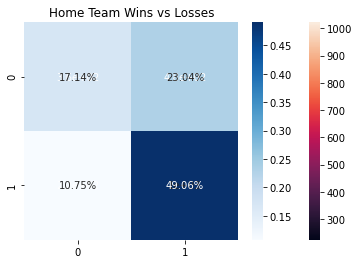

In [197]:
from sklearn.metrics import confusion_matrix
y_pred3 = clf_3.predict(X_test3)
cm = confusion_matrix(y_test3, y_pred3)
import seaborn as sns

sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Home Team Wins vs Losses')

Text(0.5, 1.0, 'Home Team Wins + Losses vs Ties')

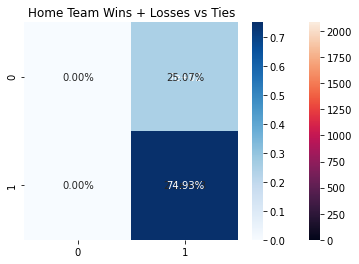

In [198]:
y_pred1 = clf_1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
import seaborn as sns

sns.heatmap(cm1, annot=True)
sns.heatmap(cm1/np.sum(cm1), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Home Team Wins + Losses vs Ties')

Text(0.5, 1.0, 'Home Team Wins + Losses vs Ties')

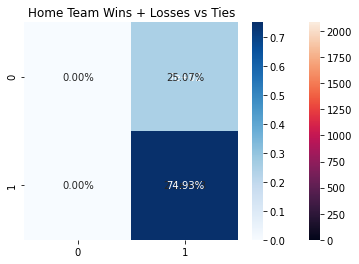

In [199]:
y_pred111 = clf_111.predict(X_test5)
cm111 = confusion_matrix(y_test5, y_pred111)
import seaborn as sns

sns.heatmap(cm111, annot=True)
sns.heatmap(cm111/np.sum(cm111), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Home Team Wins + Losses vs Ties')

In [171]:
# 2020/2021	Genoa	Napoli	3	0
GenvsNap = mt1.loc[(mt1['HomeTeam'] == 'Genoa') & (mt1['AwayTeam'] == 'Napoli') & (mt1['Season'] == '2020/2021')]
GenvsNap


,Season,Datetime,League,HomeTeam,AwayTeam,FTHG,FTAG,Hwinodds,Dodds,Awinodds,win3_tie1_loss0,club_name_H,offense_mean_H,defense_mean_H,mentality_mean_H,scoring_mean_H,agility_fitness_mean_H,overall_H,club_name_A,offense_mean_A,defense_mean_A,mentality_mean_A,scoring_mean_A,agility_fitness_mean_A,overall_A,winloss_tie_binary
27,2020/2021,2021-02-06 19:45:00,Serie A,Genoa,Napoli,2,1,5.0,3.9,1.66,3,Genoa,58.724311,62.368421,54.8,54.074472,63.262322,70.0,Napoli,64.878625,66.803258,59.438095,58.950233,68.114731,76.238095,3
